# Introduction

This project aims to identify patterns that determine whether a game is successful or not, which will then be used to find the most potential games and plan their advertising campaigns. Data related to user and expert game reviews, genre, platform (e.g. Xbox or PlayStation), and historical game sales data are available from open sources. The available data is for the year 2016 backward and the advertising campaign to be planned is for the year 2017. 

The required stages are Data loading and library, Preparing data includes understanding and reviewing the data and follow-up in the form of data improvement. Followed by data analysis and data profiling. Then ended with hypothesis testing and drawing general conclusions from all stages carried out.

# Load Data and Library

Load all library that needed.

In [34]:
# Load library
import pandas as pd
from datetime import datetime
from scipy import stats as st
import matplotlib.pyplot as plt
import math as mt
import seaborn as sns
import numpy as np

In [35]:
# Load data file into DataFrame
df = pd.read_csv('D:\Pekerjaan\Data Science Bootcamp\Integrated_project_1\games.csv')

# Data Preparation

In preparing the data for analysis, it is necessary to correct the data if there are missing values or inappropriate formats. But before moving on to data correction, looking at general information and sample data is also needed to know more specifically the data that needs to be corrected.

In [36]:
# Show general information about the existing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [37]:
# Show data sample
df.sample()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
10256,Shining Ark,PSP,2013.0,Role-Playing,0.0,0.0,0.11,0.0,NaN,NaN,NaN


The interim results show that the column names are still capitalized at the beginning and there are some missing values in some columns such as `Name` and `Critic_Score` with varying amounts, but there are also column formats that do not match such as in the `Year_of_Release` column which has a float64 format.

## Data Correction

At this stage, the column names will be changed to all lowercase letters, and format conversions will be performed on the `year_of_release` and `user_score` columns, and the handling of missing values will be handled in different ways according to further review of each column.

In [38]:
# Rename all columns to lowercase
df.columns = df.columns.str.lower()

In [39]:
# Converting column format 'year_of_release' from float64 to datetime
df['year_of_release'] = pd.to_datetime(df['year_of_release'], format='%Y')

In [40]:
# Checking a missing value in 'name' dan 'genre' columns
df[(df['name'].isna()) & (df['genre'].isna())]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993-01-01,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993-01-01,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Nilai yang hilang pada kedua kolom ini memiliki pola yang sama dan kemungkinan nilai yang hilang ini terjadi pada nama game dan genre yang sama karena mengacu dari platform yang digunakan dan tahun rilis yang ada. Sebagai penanganannya nilai yang hilang akan diisi dengan string 'Unknown'.

In [41]:
# Fill missing value in 'name' column with fillna() 
df['name'] = df['name'].fillna('Unknown')

In [42]:
# Fill missing value in 'genre' with fillna()
df['genre'] = df['genre'].fillna('Unknown')

In [43]:
# Checking a missing value in 'name' dan 'genre' columns
df[(df['rating'].isna()) & (df['critic_score'].isna()) & (df['user_score'].isna())]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989-01-01,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984-01-01,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005-01-01,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016-01-01,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006-01-01,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016-01-01,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003-01-01,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


The missing values in the `rating`, `critic_score` and `user_score` columns appear to have some similarities. However, if we look further, the missing values occur in games that have been released for more than 10 years and games with fewer sales. The provisional conclusion is that in the past few years, online ratings have not been available and the missing scores on less sold games are due to the fact that few people play the game and they do not rate the game. As a workaround the missing values in the `rating` column will be filled with the string 'None'. Then the `critic_score` column will be filled with the median or mean value with reference to the game name by looking at the data distribution first and for `user_score` because it is in object format it will be reviewed further regarding the handling.

In [44]:
# Fill missing value in 'rating' column with fillna()
df['rating'] = df['rating'].fillna('None')

In [45]:
# Checking 'tbd' value in 'user_score' column
df[df['user_score']=='tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010-01-01,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005-01-01,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011-01-01,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010-01-01,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaT,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001-01-01,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003-01-01,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008-01-01,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008-01-01,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


The value 'tbd' in the `user_score` column behaves like a missing value because there is a possibility that the data does not exist and there is a possibility that the value will be large or small. The handling done will change the string 'tbd' to np.nan. then the missing value will be filled with the median or mean value by referring to the game name and by looking at the data distribution with the describe() function.

In [46]:
# Change 'tbd' format becomes np.nan or missing value
df['user_score'] = df['user_score'].replace('tbd', np.nan)

In [47]:
# Change 'user_score' column format from object to float
df['user_score'] = df['user_score'].astype('float')

In [48]:
# Show statistic description from dataframe
df.describe()

,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000,7590.000000
mean,0.263377,0.145060,0.077617,0.047342,68.967679,7.125046
std,0.813604,0.503339,0.308853,0.186731,13.938165,1.500006
min,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000
50%,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000
75%,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000
max,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000


The mean and median values in the `critic_score` and `user_score` columns are very different and the median value is greater than the mean value. It is likely that there are significant outliers in the data. Therefore, the missing values in both columns will be filled with the median.

In [49]:
# function that will be used to fill in the missing values
def fill_nan_median(dataframe, agg_column, value_column):
    grouped_values = dataframe.groupby(agg_column)[value_column].median().reset_index()
    size = len(grouped_values)
    for i in range (size):
        group = grouped_values[agg_column][i]
        value = grouped_values[value_column][i]
        dataframe.loc[(dataframe[agg_column]==group) & (dataframe[value_column].isna()), value_column] = value
    return dataframe

In [50]:
# Fill missing value in `critic_score` column
fill_nan_median(df,'name','critic_score')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,NaN,NaN,None
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016-01-01,Action,0.00,0.00,0.01,0.00,NaN,NaN,None
16711,LMA Manager 2007,X360,2006-01-01,Sports,0.00,0.01,0.00,0.00,NaN,NaN,None
16712,Haitaka no Psychedelica,PSV,2016-01-01,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,None
16713,Spirits & Spells,GBA,2003-01-01,Platform,0.01,0.00,0.00,0.00,NaN,NaN,None


In [51]:
# Fill missing value in `user_score` column
fill_nan_median(df,'name','user_score')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,NaN,NaN,None
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016-01-01,Action,0.00,0.00,0.01,0.00,NaN,NaN,None
16711,LMA Manager 2007,X360,2006-01-01,Sports,0.00,0.01,0.00,0.00,NaN,NaN,None
16712,Haitaka no Psychedelica,PSV,2016-01-01,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,None
16713,Spirits & Spells,GBA,2003-01-01,Platform,0.01,0.00,0.00,0.00,NaN,NaN,None


In [52]:
# checking missing value in 'year_of_release' column
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaT,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaT,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaT,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaT,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,None
609,Space Invaders,2600,NaT,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaT,Sports,0.01,0.00,0.00,0.00,43.0,5.4,E10+
16405,Freaky Flyers,GC,NaT,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaT,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaT,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,None


The missing values in the `year_of_release` column have no pattern and are random, filling in the missing values will cause confusion if for example the game name FIFA Soccer 2004 and will be filled in the release year value with the median release year of 2008. This is quite difficult to do. Therefore, this column will not handle missing values.

In [53]:
# Display general dataframe information again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16715 non-null  object        
 1   platform         16715 non-null  object        
 2   year_of_release  16446 non-null  datetime64[ns]
 3   genre            16715 non-null  object        
 4   na_sales         16715 non-null  float64       
 5   eu_sales         16715 non-null  float64       
 6   jp_sales         16715 non-null  float64       
 7   other_sales      16715 non-null  float64       
 8   critic_score     9098 non-null   float64       
 9   user_score       8689 non-null   float64       
 10  rating           16715 non-null  object        
dtypes: datetime64[ns](1), float64(6), object(4)
memory usage: 1.4+ MB


In the `critic_score` and `user_score` columns there are still missing values, this means that the missing values are for games that only exist on one platform. In this case, the missing values will be filled with 0 because there is no definite reference for filling in missing values.

In [54]:
# Fill missing value in `critic_score` column
df['critic_score'] = df['critic_score'].fillna(0)

In [55]:
# Fill missing value in `user_score` column
df['user_score'] = df['user_score'].fillna(0)

In [56]:
# Display general dataframe information again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16715 non-null  object        
 1   platform         16715 non-null  object        
 2   year_of_release  16446 non-null  datetime64[ns]
 3   genre            16715 non-null  object        
 4   na_sales         16715 non-null  float64       
 5   eu_sales         16715 non-null  float64       
 6   jp_sales         16715 non-null  float64       
 7   other_sales      16715 non-null  float64       
 8   critic_score     16715 non-null  float64       
 9   user_score       16715 non-null  float64       
 10  rating           16715 non-null  object        
dtypes: datetime64[ns](1), float64(6), object(4)
memory usage: 1.4+ MB


Preparing the data for further analysis has already been done, but the final step to make the analysis easier is to add the total sales from all the regions to find out what platforms are most popular and what genres are most popular.

In [57]:
# Add a 'total_sales' column to the dataframe that contains the total value of the 'na_sales', 'eu_sales', 'jp_sales' and 'other_sales' columns
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [58]:
# Displays 5 rows of data already prepared for analysis
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,0.0,0.0,None,40.24
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,None,31.38


# Data Analysis

This will require some review of how many games are released in each year, what platforms have the highest sales, what platforms were once popular but are now not and how many year periods will be taken for further analysis.

Once the data has been sorted into the required year periods, a review of the platforms with the highest sales will be conducted. In addition, it is necessary to review the average sales which will be displayed with a boxplot, review the correlation between user reviews and total sales by displaying a scatterplot, and finally review the genres with high and low sales.

In [59]:
# Analyze the number of games released each year
df['year_of_release'].value_counts()

2008-01-01    1427
2009-01-01    1426
2010-01-01    1255
2007-01-01    1197
2011-01-01    1136
2006-01-01    1006
2005-01-01     939
2002-01-01     829
2003-01-01     775
2004-01-01     762
2012-01-01     653
2015-01-01     606
2014-01-01     581
2013-01-01     544
2016-01-01     502
2001-01-01     482
1998-01-01     379
2000-01-01     350
1999-01-01     338
1997-01-01     289
1996-01-01     263
1995-01-01     219
1994-01-01     121
1993-01-01      62
1981-01-01      46
1992-01-01      43
1991-01-01      41
1982-01-01      36
1986-01-01      21
1989-01-01      17
1983-01-01      17
1990-01-01      16
1987-01-01      16
1988-01-01      15
1985-01-01      14
1984-01-01      14
1980-01-01       9
Name: year_of_release, dtype: int64

<Axes: xlabel='year_of_release'>

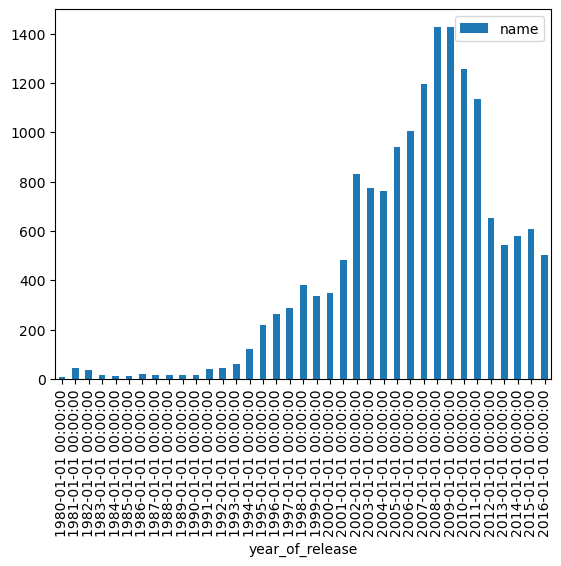

In [60]:
# Analyze the number of games released each year by displaying a bar chart
df.pivot_table(index='year_of_release', values='name', aggfunc='count').sort_values(by='year_of_release').plot(kind='bar')

The most games were released in 2008 with a total of 1427 games and there was the highest increase in this case from 2005 to 2008. In the period of the following years and before there was no such increase and tended to go up and down each year.

In [61]:
# Calculate total sales on each platform with pivot_table()
df_pivot_table = df.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)

In [62]:
# Showcasing the 5 platforms with the highest sales
df_pivot_table.head()

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12


The highest total game sales in the historical data up to 2016 is the PS2 platform. Next, we will analyze the sales behavior of the top 5 platforms with the highest total sales. 

<Axes: xlabel='year_of_release'>

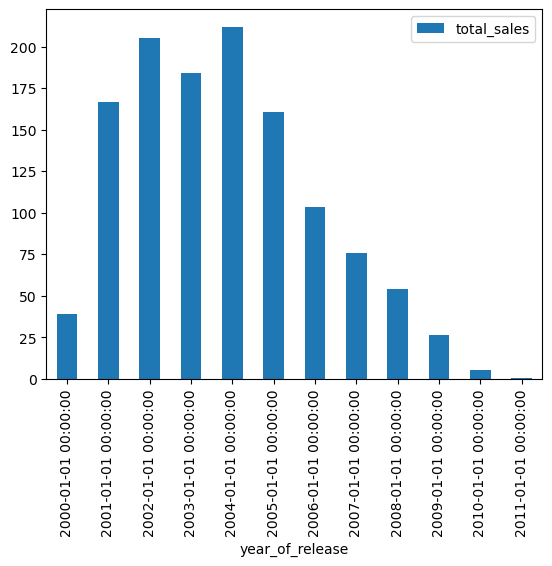

In [63]:
# Retrieve PS2 platform data slices with query()
ps2_sales = df.query('platform == "PS2"')

# Calculate the total sales value of PS2 and display in a bar chart for each year
ps2_sales.pivot_table(index='year_of_release',values='total_sales', aggfunc='sum').plot(kind='bar')
                     

<Axes: xlabel='year_of_release'>

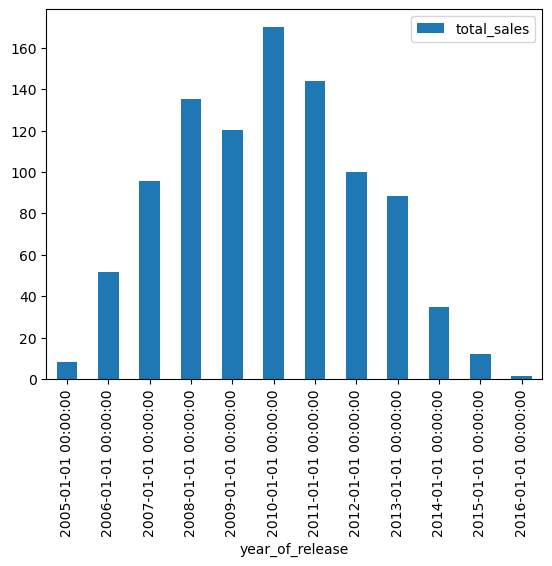

In [64]:
# Retrieve X360 platform data slices with query()
X360_sales = df.query('platform == "X360"')

# Calculate the total sales value of X360 and display in a bar chart for each year
X360_sales.pivot_table(index='year_of_release',values='total_sales', aggfunc='sum').plot(kind='bar')

<Axes: xlabel='year_of_release'>

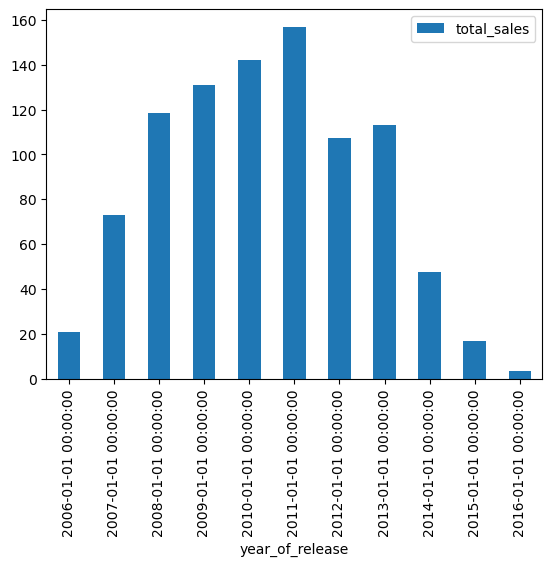

In [65]:
# Retrieve PS3 platform data slices with query()
ps3_sales = df.query('platform == "PS3"')

# Calculate the total sales value of PS3 and display in a bar chart for each year
ps3_sales.pivot_table(index='year_of_release',values='total_sales', aggfunc='sum').plot(kind='bar')

<Axes: xlabel='year_of_release'>

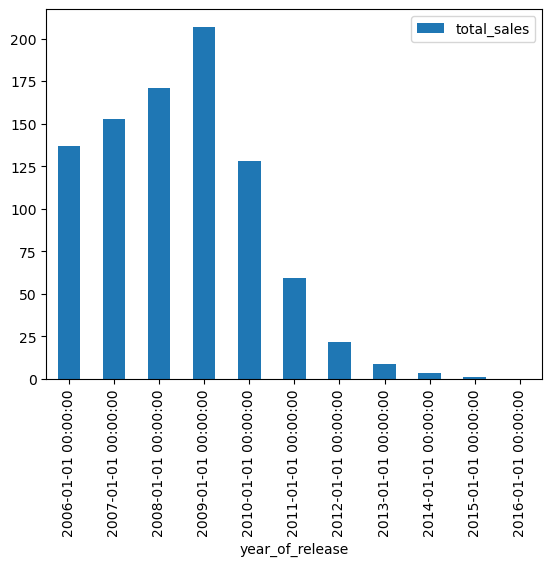

In [66]:
# Retrieve Wii platform data slices with query()
Wii_sales = df.query('platform == "Wii"')

# Calculate the total sales value of PS3 and display in a bar chart for each year
Wii_sales.pivot_table(index='year_of_release',values='total_sales', aggfunc='sum').plot(kind='bar')

<Axes: xlabel='year_of_release'>

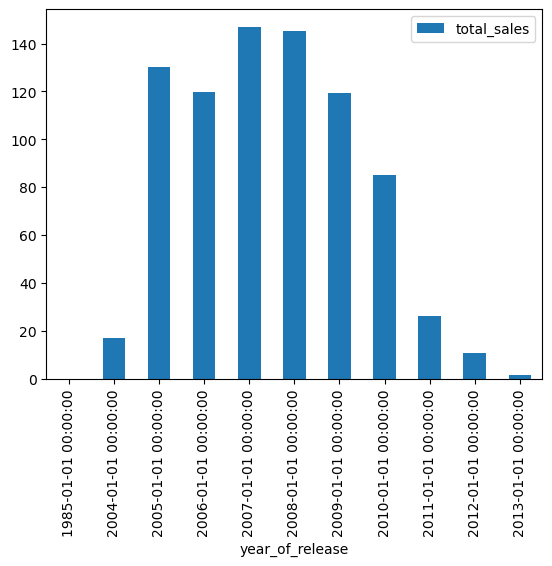

In [67]:
# Retrieve DS platform data slices with query()
DS_sales = df.query('platform == "DS"')

# Calculate the total sales value of DS and display in a bar chart for each year
DS_sales.pivot_table(index='year_of_release',values='total_sales', aggfunc='sum').plot(kind='bar')

The results of the 5 platforms with the most sales found that it generally takes 4 to 6 years for a platform to start to appear to become popular and takes 5 to 7 years for a platform from the peak of its popularity to fade its popularity from the market. In this case, it can be concluded that the data period that will be used for further analysis is the past 6 years of data, namely the period 2011 - 2016.

In [68]:
# Taking slices of release year data above 2010
df1 = df.query('year_of_release > 2010')

In [69]:
# Calculate the total sales on each platform and sort them by highest sales to lowest sales
df1_pivot_table = df1.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)

In [70]:
# Display total sales on each platform
df1_pivot_table

,total_sales
platform,
PS3,445.57
X360,380.38
PS4,314.14
3DS,257.81
XOne,159.32
PC,97.68
Wii,95.02
WiiU,82.19
PSV,53.81


The platform with the highest sales in the 2011-2016 period is PS3 and the lowest sales are on PS2. Taking the last 6 years of data makes a significant difference where the overall year data is PS2 with the most sales while the 2011-2016 period is PS3.

<Axes: xlabel='platform', ylabel='total_sales'>

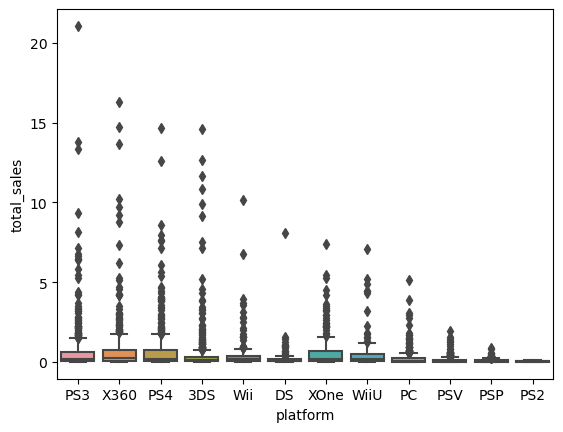

In [71]:
# Display a boxplot of total sales on each platform
sns.boxplot(x=df1['platform'], y=df1['total_sales'])

The difference in game sales on each platform tends to be different, but 2 of the 3 platforms with the highest sales have a data distribution that does not seem to have a significant difference.

<Axes: xlabel='platform'>

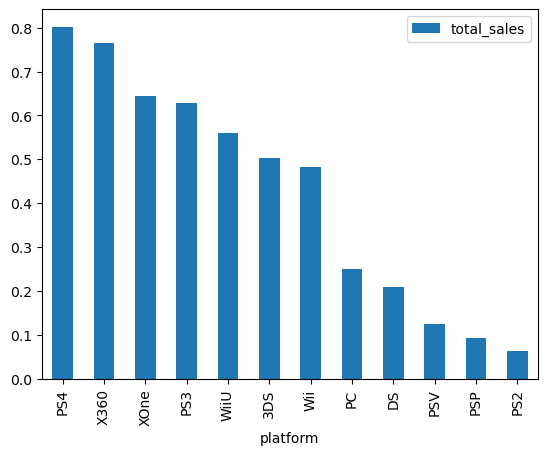

In [72]:
df1.pivot_table(index='platform', values='total_sales', aggfunc='mean').sort_values(by='total_sales',ascending=False).plot(kind='bar')

The highest sales averages are the PS4 platforms that previously had the highest total sales ranked at number 3 and the PS3 platforms with the most sales totals were at number 4. This means that in the 2011-2016 period the sales of games from PS4 Platforms tended to be more stable than other platforms.

<Axes: xlabel='user_score', ylabel='total_sales'>

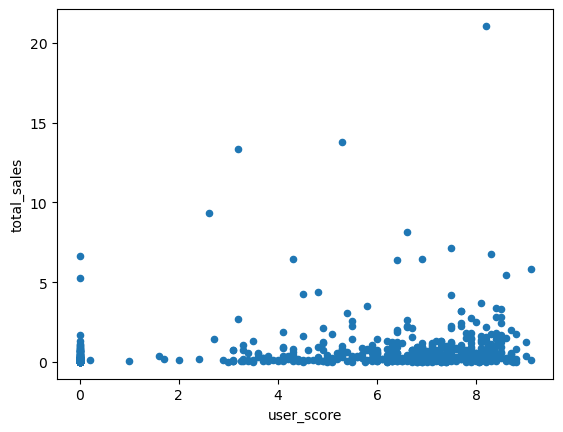

In [73]:
# Show correlation betwee 'user_score' with 'total_sales' in PS3 platform with scatterplot 
df1.query('platform=="PS3"').plot(x='user_score', y='total_sales', kind='scatter')

In [74]:
# Show correlation betwee 'user_score' with 'total_sales' in PS3 platform
df1_ps3 = df1.query('platform=="PS3"')

df1_ps3[['total_sales','user_score']].corr()

,total_sales,user_score
total_sales,1.000000,0.206407
user_score,0.206407,1.000000


It can be seen that the correlation that occurs between `user_score` and `total_sales` is only about 20% and this indicates that there is no high correlations of the two columns.

In [75]:
# Count and show 15 total lines of sales on each game based on each platform
df1.pivot_table(index=['name','platform'], values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).head(15)

total_sales
name                                      platform             
Grand Theft Auto V                        PS3             21.05
                                          X360            16.27
Call of Duty: Modern Warfare 3            X360            14.73
Call of Duty: Black Ops 3                 PS4             14.63
Pokemon X/Pokemon Y                       3DS             14.60
Call of Duty: Black Ops II                PS3             13.79
                                          X360            13.68
Call of Duty: Modern Warfare 3            PS3             13.33
Mario Kart 7                              3DS             12.65
Grand Theft Auto V                        PS4             12.62
Pokemon Omega Ruby/Pokemon Alpha Sapphire 3DS             11.68
Super Mario 3D Land                       3DS             10.81
Call of Duty: Ghosts                      X360            10.24
Just Dance 3                              Wii             10.12
New Super Mario Bros. 2                   3DS              9.90

Looks like there's no pattern between the total sales and the platform the game comes from. For example, Grand Theft Auto V has the highest total sales on the PS3 platform than on the X360 and PS4. However, on the other side of the game Call of Duty: Modern Warfare 3 has the higher total sales with the X 360 platform than the PS3.

<Axes: xlabel='genre'>

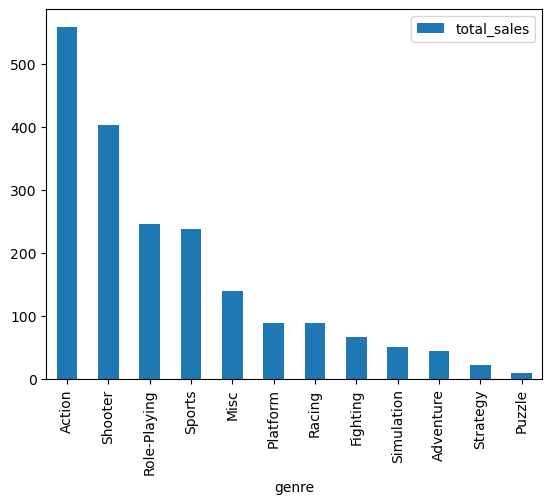

In [76]:
# Menghitung dan menampilkan total penjualan berdasarkan tiap genre dalam diagram batang
df1.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(by='total_sales',ascending=False).plot(kind='bar')

The result on the bar diagram explains that games with action genres are more popular in the market while games with puzzle genres aren't very popular on the market. However, this can not be used as a reference because there is a possibility that makes the action genre more profitable is because only one game in the period and there is also a possible difference in the number of games sold in each genre which makes the sales value different.

# Region Profiling

Profiling each region (na, eu, jp) will be done to find out the sales differences of each region. For the following analysis will be done based on platforms and genres.

In [77]:
# Calculate the total aggregation of each region based on the platform
top_platform = df1.pivot_table(index='platform', values=['na_sales','eu_sales','jp_sales'], aggfunc='sum')

In [78]:
# Sorting NA territory sales in ascending order
na_top_platform = top_platform.sort_values(by='na_sales',ascending=False)

# show 5 first row
na_top_platform.head()

,eu_sales,jp_sales,na_sales
platform,,,
X360,117.10,3.35,226.80
PS3,163.10,49.39,168.26
PS4,141.09,15.96,108.74
XOne,51.59,0.34,93.12
3DS,61.27,100.62,82.65


In [79]:
# Sorting EU territory sales in ascending order
eu_top_platform = top_platform.sort_values(by='eu_sales',ascending=False)

# show 5 first row
eu_top_platform.head()

,eu_sales,jp_sales,na_sales
platform,,,
PS3,163.10,49.39,168.26
PS4,141.09,15.96,108.74
X360,117.10,3.35,226.80
3DS,61.27,100.62,82.65
PC,56.70,0.00,29.88


In [80]:
# Sorting JP territory sales in ascending order
jp_top_platform = top_platform.sort_values(by='jp_sales',ascending=False)

# show 5 first row
jp_top_platform.head()

,eu_sales,jp_sales,na_sales
platform,,,
3DS,61.27,100.62,82.65
PS3,163.10,49.39,168.26
PSP,1.77,24.04,2.19
PSV,13.07,21.84,12.47
PS4,141.09,15.96,108.74


Based on the analysis that has been done, the region of the top 5 platforms with the highest sales is X360. Then for the EU region of top 5 plates with the most sales is PS3. For the region jp top 5 the platform with the higher sales is 3DS. This quite variable difference is likely due to the circulation of the game console of the company of the platform. The more popular such platforms then the sales of games obtained greater than the less popular platforms.It's shown with the PS3, 3DS and PS4 being the platform with the most consistent sales in each region as it's in the top 5 with the highest sales.

In [81]:
# Count the total sum of each region based on the genre
top_genre = df1.pivot_table(index='genre', values=['na_sales','eu_sales','jp_sales'], aggfunc='sum')

In [82]:
# Sorting NA territory sales in ascending order
na_top_genre = top_genre.sort_values(by='na_sales',ascending=False)

# show 5 first row
na_top_genre.head()

,eu_sales,jp_sales,na_sales
genre,,,
Action,199.12,63.62,230.92
Shooter,148.02,11.92,194.43
Sports,88.48,11.09,108.70
Role-Playing,62.30,79.87,83.78
Misc,39.72,17.60,69.69


In [83]:
# Sorting EU territory sales in ascending order
eu_top_genre = top_genre.sort_values(by='eu_sales',ascending=False)

# show 5 first row
eu_top_genre.head()

,eu_sales,jp_sales,na_sales
genre,,,
Action,199.12,63.62,230.92
Shooter,148.02,11.92,194.43
Sports,88.48,11.09,108.70
Role-Playing,62.30,79.87,83.78
Racing,40.58,5.64,31.98


In [84]:
# Sorting JP territory sales in ascending order
jp_top_genre = top_genre.sort_values(by='jp_sales',ascending=False)

# show 5 first row
jp_top_genre.head()

,eu_sales,jp_sales,na_sales
genre,,,
Role-Playing,62.30,79.87,83.78
Action,199.12,63.62,230.92
Misc,39.72,17.60,69.69
Fighting,16.24,12.38,31.63
Platform,30.07,12.13,38.28


Based on the analysis that has been done, the na region and the eu prefer games with the genre of Action, while the jp region prefers games with a genre of Role-playing. These differences are likely due to habits or hobbies. People in each region, region and EU tend to have the same habits and hobbies, but people in the region tend to be different. But the most popular genres in the region are Action and Role-playing, as they are among the top five of the region's most popular.

In [85]:
# Count the total sum of each region based on the rating
rating_index = df1.pivot_table(index='rating', values=['na_sales','eu_sales','jp_sales'], aggfunc='sum').sort_values(by='na_sales',ascending=False)

In [86]:
# Sorting NA territory sales in descending order
na_rating = rating_index.sort_values(by='na_sales',ascending=False)

# show 5 first row
na_rating

,eu_sales,jp_sales,na_sales
rating,,,
M,250.26,26.14,308.45
E,141.73,36.68,170.17
None,116.61,138.21,123.69
E10+,78.00,11.23,117.72
T,83.16,33.39,109.31
EC,0.00,0.00,0.42
RP,0.03,0.00,0.00


In [87]:
# Sorting EU territory sales in descending order
eu_rating = rating_index.sort_values(by='eu_sales',ascending=False)

# show 5 first row
eu_rating

,eu_sales,jp_sales,na_sales
rating,,,
M,250.26,26.14,308.45
E,141.73,36.68,170.17
None,116.61,138.21,123.69
T,83.16,33.39,109.31
E10+,78.00,11.23,117.72
RP,0.03,0.00,0.00
EC,0.00,0.00,0.42


In [88]:
# Sorting JP territory sales in descending order
jp_rating = rating_index.sort_values(by='jp_sales',ascending=False)

# show 5 first row
jp_rating

,eu_sales,jp_sales,na_sales
rating,,,
None,116.61,138.21,123.69
E,141.73,36.68,170.17
T,83.16,33.39,109.31
M,250.26,26.14,308.45
E10+,78.00,11.23,117.72
EC,0.00,0.00,0.42
RP,0.03,0.00,0.00


Based on the analysis that has been done, the rating has an influence on sales in each region with the na and eu prefer games with the M rating while the jp region prefers games with E rating.

# Hypothesis Testing

The hypotheses to be tested in this discussion are two, namely:

— The average rating of Xbox One platform users and PCs is the same.

— The average rating of users of the genre Action and Sports is different.

Before performing the analysis, the required data sorting will be done to collect the data to be tested.

In [89]:
xone_user_score = df1.query('platform == "XOne"')

xone_user_score['user_score'].mean()

5.518825910931175

In [90]:
pc_user_score = df1.query('platform == "PC"')

pc_user_score['user_score'].mean()

5.187146529562982

In [91]:
action_user_score = df1.query('genre == "Action"')

action_user_score

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013-01-01,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013-01-01,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
42,Grand Theft Auto V,PS4,2014-01-01,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
81,FIFA Soccer 13,PS3,2012-01-01,Action,1.06,5.01,0.13,1.97,88.0,6.6,E,8.17
118,Uncharted 3: Drake's Deception,PS3,2011-01-01,Action,2.77,2.75,0.19,1.03,92.0,8.3,T,6.74
...,...,...,...,...,...,...,...,...,...,...,...,...
16680,Kyoukai no Shirayuki,PSV,2016-01-01,Action,0.00,0.00,0.01,0.00,0.0,0.0,None,0.01
16691,Dynasty Warriors: Eiketsuden,PS3,2016-01-01,Action,0.00,0.00,0.01,0.00,0.0,0.0,None,0.01
16692,Metal Gear Solid V: Ground Zeroes,PC,2014-01-01,Action,0.00,0.01,0.00,0.00,80.0,7.6,M,0.01
16699,The Longest 5 Minutes,PSV,2016-01-01,Action,0.00,0.00,0.01,0.00,0.0,0.0,None,0.01


In [92]:
sports_user_score = df1.query('genre == "Sports"')

sports_user_score

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
77,FIFA 16,PS4,2015-01-01,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
94,FIFA 17,PS4,2016-01-01,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
122,FIFA 12,PS3,2011-01-01,Sports,0.84,4.30,0.11,1.39,0.0,0.0,None,6.64
126,FIFA 14,PS3,2013-01-01,Sports,0.78,4.24,0.07,1.37,86.0,4.3,E,6.46
143,FIFA 15,PS4,2014-01-01,Sports,0.80,4.33,0.05,0.90,82.0,5.7,E,6.08
...,...,...,...,...,...,...,...,...,...,...,...,...
16518,Rugby World Cup 2015,PC,2015-01-01,Sports,0.00,0.01,0.00,0.00,25.0,1.4,E,0.01
16562,Outdoors Unleashed: Alaska 3D,3DS,2011-01-01,Sports,0.01,0.00,0.00,0.00,0.0,0.0,T,0.01
16638,Tour de France 2014,PS3,2014-01-01,Sports,0.00,0.01,0.00,0.00,53.0,5.1,E,0.01
16643,Rugby Challenge 3,XOne,2016-01-01,Sports,0.00,0.01,0.00,0.00,64.0,6.6,E,0.01


Testing a hypothesis will use an alpha value of 0.05 or 5% taking the risk level assuming that a probability below 5% of the correct hypotheses will be rejected. Also by assuming the variance value of each data is the same.

In [93]:
# First Hypothesis testing

alpha = 0.05

results = st.ttest_ind(xone_user_score['user_score'],pc_user_score['user_score'])

print('p-value:', results.pvalue)

# membandingkan nilai p dengan tingkat signifikansi
if results.pvalue < alpha:
    print("We reject nul hypothesis")
else:
    print("We can't reject nul hypothesis")

p-value: 0.1567462631581461
We can't reject nul hypothesis


The analysis resulted that the average rating of Xbox One and PC users was the same (not significantly different). However, the 15% rating was not the primary reference in this issue to find this equation. The value was also too low to state that there was a similarity with the XOne and PC platforms average rating.

In [94]:
# Second Hypothesis testing

alpha = 0.05

results = st.ttest_ind(action_user_score['user_score'],sports_user_score['user_score'])

print('p-value:', results.pvalue)

# comparing the p value with the level of significance
if results.pvalue < alpha:
    print("We reject nul hypothesis")
else:
    print("We can't reject nul hypothesis")

p-value: 0.7399295541568988
We can't reject nul hypothesis


The analysis resulted that the average rating of users in the Action and Sports genres was different (significantly different). However, the 73% rating was a very high value to be a reference for finding a difference in the average ratings of users of Action and Sport genres.

# General Conclusion

From the analysis that has been done, the conclusion is as follows: 
- In the initial data checking some missing values were found in several columns such as `Name`, `Genre`, 'Year_of_Release`, ''Critic_Score`', `User_Score` and `Rating` with different amounts, but there are also inappropriate column formats, such as in the float64 and 'User _Score' formats containing float values but object-formatted. In this case, the column name also contains the original capital letters. The action is to rename the columns to all small letters, change the format of the column `year_of_release` to datetime and change the value of 'tbd' on the `User_Score` to np.nan before changing the columna format to float. The missing values in the `Name` and `Genre` columns are filled with 'Unknown' string, in the 'Year_of_Release' column, 'Critic_Score' and 'User_Scored' columnas are median and in the'Rating 'column are loaded with the 'None' string.
- The most games were released in 2008 with a total of 1427 games and there was the highest increase in this occurred in 2005 through 2008.
- The analysis results of the 5 most-selling platforms get that it usually takes 4 to 6 years for a platform to start appearing early on to become popular and it takes 5 to 7 years for an platform from its peak popularity to fading its popularity from the market. The data used is 6 years back in the period 2011-2016. - The PS3 is the most-selling platform, but the PS4 has a higher average of sales.
- There is no correlation between `user_score` and `total_sales` and there is no relationship between the low level of game sales and the platform from which the game was released. - Action genres are more common in the market while games with puzzle genres aren't very common in this market. However, this cannot be used as a benchmark because there is a possibility that making the Action genre more profitable is because of one game in that period and there is also a possible difference in the number of games sold in each genre that makes the sales value different. - Sales based on platforms in each region get that the PS3, 3DS and PS4 are the most popular ones. This is shown by the PS3s, 3DSs and the PS4 is the platform with the most consistent sales in every region because it is in the top 5 of the highest sales. Sales based on platforms in each region get that the na and eu region prefer games with the genre Action. Whereas the jp region prefers the genre Role-playing. However, the most popular genres throughout the region are the genres Action and Role Playing as they are among the top 5 genres most popular in the region. Sales based on ratings have influence like in the na and eu regions that prefer games with M ratings while the jp region prefers games with E ratings. It can be concluded that the na region and the eu region have almost the same interest in all factors compared to the JP region that has its own interests.
- Testing the hypothesis The average rating of Xbox One and PC platform users is the same resulting that the average rating for Xbox One platform users and PCs are the same (tidak berbeda secara signifikan). However, the 15% rating is not the primary reference in this issue to find this equation. It is also too low to state that there is a similarity with the average rating of XOne and PC platforms. Testing the hypothesis that the average ratings of users of different Action and Sports genres differ, results in that the mean rating of action and sports genres differs significantly. However, 73% is a very high rating to be a reference for finding a difference in the average user rating of Action and Sport genres. - Good games to use as advertising campaigns in 2017 are games with Action or Role-playing genres and come from PS3, PS4 and 3DS platforms, as well as games that have the ESRB ratings M and E.